# Assignment - 16  Neural Networks ( Gas Turbine )

## Import Necessary Libraries

In [1]:
!pip install tensorflow

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
 

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [3]:
gas = pd.read_csv(r'D:\Downloads\gas_turbines.csv')
gas

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


## Data understanding 

In [4]:
gas.shape

(15039, 11)

In [5]:
gas.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [6]:
gas.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

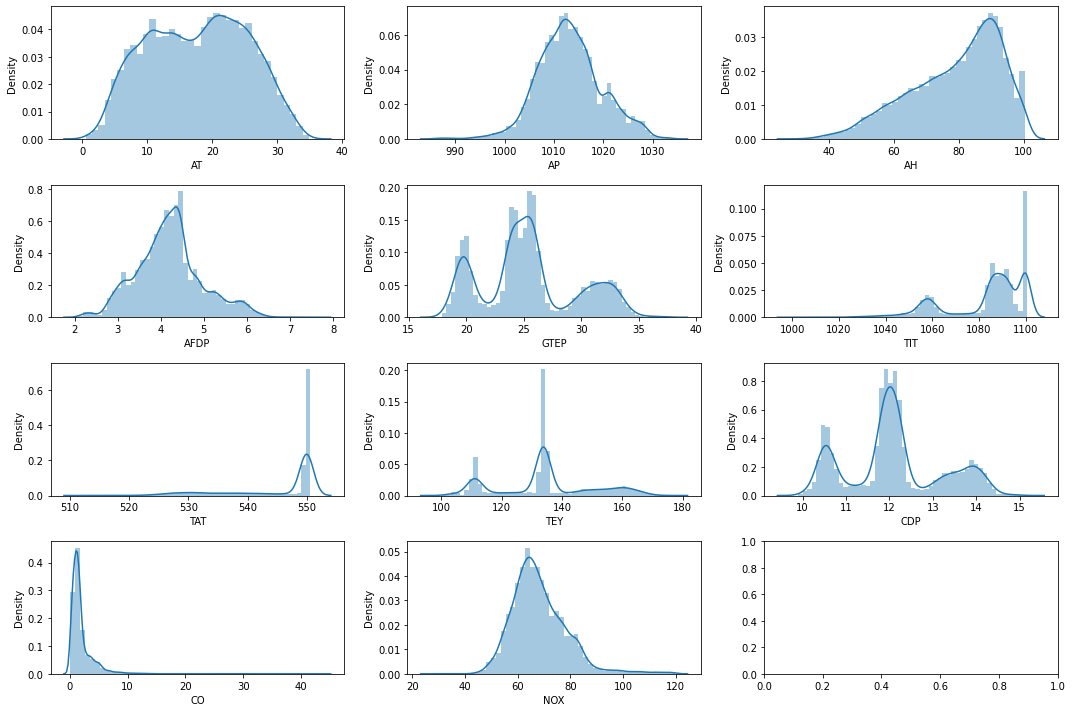

In [7]:
fig, ax = plt.subplots(4,3, figsize=(15,10))
sns.distplot(gas.AT, ax=ax[0,0])
sns.distplot(gas.AP, ax=ax[0,1])
sns.distplot(gas.AH, ax=ax[0,2])
sns.distplot(gas.AFDP, ax=ax[1,0])
sns.distplot(gas.GTEP, ax=ax[1,1])
sns.distplot(gas.TIT, ax=ax[1,2])
sns.distplot(gas.TAT, ax=ax[2,0])
sns.distplot(gas.TEY, ax=ax[2,1])
sns.distplot(gas.CDP, ax=ax[2,2])
sns.distplot(gas.CO, ax=ax[3,0])
sns.distplot(gas.NOX, ax=ax[3,1])

plt.tight_layout()
plt.show()

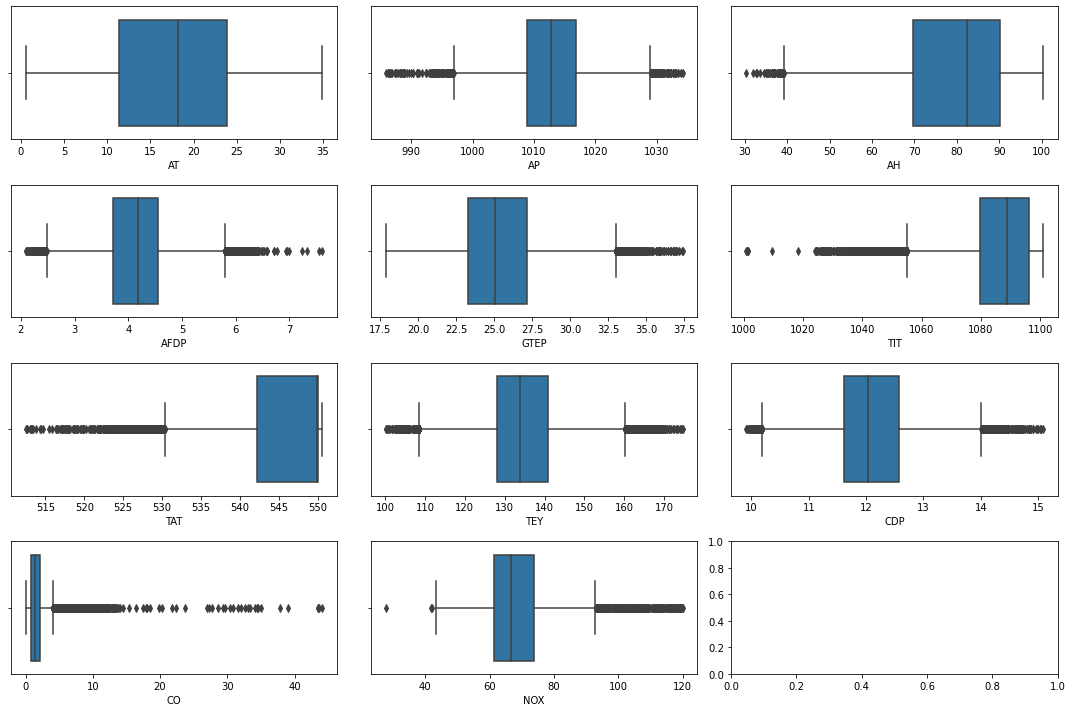

In [8]:
fig, ax = plt.subplots(4,3, figsize=(15,10))
sns.boxplot(gas.AT, ax=ax[0,0])
sns.boxplot(gas.AP, ax=ax[0,1])
sns.boxplot(gas.AH, ax=ax[0,2])
sns.boxplot(gas.AFDP, ax=ax[1,0])
sns.boxplot(gas.GTEP, ax=ax[1,1])
sns.boxplot(gas.TIT, ax=ax[1,2])
sns.boxplot(gas.TAT, ax=ax[2,0])
sns.boxplot(gas.TEY, ax=ax[2,1])
sns.boxplot(gas.CDP, ax=ax[2,2])
sns.boxplot(gas.CO, ax=ax[3,0])
sns.boxplot(gas.NOX, ax=ax[3,1])

plt.tight_layout()
plt.show()

## Model Preparation

In [9]:
x = gas.drop('TEY' , axis= 1)
y = gas[['TEY']]

In [10]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [11]:
y

,TEY
0,114.70
1,114.72
2,114.71
3,114.72
4,114.72
...,...
15034,111.61
15035,111.78
15036,110.19
15037,110.74


##  Model Building

In [12]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size= 0.20 )

In [13]:
model = Sequential()
model.add(Dense(12, input_dim = 10, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(8,  kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1,  kernel_initializer = 'uniform', activation = 'linear'))

In [14]:
model.compile(loss = 'mse', optimizer='adam', metrics=['accuracy'])

## Model Training

In [18]:
gas1 = model.fit(x_train, y_train, validation_split=0.33, epochs=50, batch_size=10)
gas1

Epoch 1/50
806/806 [==============================] - 4s 5ms/step - loss: 1.5041 - accuracy: 0.0000e+00 - val_loss: 1.3010 - val_accuracy: 0.0000e+00
Epoch 2/50
806/806 [==============================] - 4s 5ms/step - loss: 1.6479 - accuracy: 0.0000e+00 - val_loss: 1.4151 - val_accuracy: 0.0000e+00
Epoch 3/50
806/806 [==============================] - 5s 6ms/step - loss: 1.5640 - accuracy: 0.0000e+00 - val_loss: 1.3604 - val_accuracy: 0.0000e+00
Epoch 4/50
806/806 [==============================] - 3s 4ms/step - loss: 1.5836 - accuracy: 0.0000e+00 - val_loss: 1.2267 - val_accuracy: 0.0000e+00
Epoch 5/50
806/806 [==============================] - 3s 4ms/step - loss: 1.5571 - accuracy: 0.0000e+00 - val_loss: 1.2133 - val_accuracy: 0.0000e+00
Epoch 6/50
806/806 [==============================] - 3s 4ms/step - loss: 1.6123 - accuracy: 0.0000e+00 - val_loss: 1.3503 - val_accuracy: 0.0000e+00
Epoch 7/50
806/806 [==============================] - 4s 4ms/step - loss: 1.5691 - accuracy: 0.0000e

## Model Evaluation

In [19]:
model.evaluate(x_test,y_test)

94/94 [==============================] - 0s 2ms/step - loss: 1.1983 - accuracy: 0.0000e+00


[1.1983155012130737, 0.0]

## Model Performance

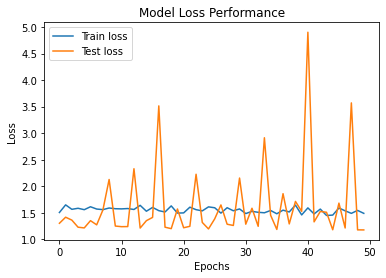

In [20]:
plt.plot(gas1.history['loss'] , label = 'Train loss')
plt.plot(gas1.history['val_loss'] , label = 'Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Performance')
plt.legend()
plt.show()